<a href="https://colab.research.google.com/github/kumarmohit0911/AAA/blob/main/DataLoading_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json, os

kaggle_creds = {
    "username": "kumarmohit0911",
    "key": "KGAT_70d781b0a7eed54b863a6bcb5ab50e9c"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_creds, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("kaggle.json created successfully")


kaggle.json created successfully


In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaustubhb999/tomatoleaf")

print("Path to dataset files:", path)

100%|██████████| 179M/179M [00:02<00:00, 82.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1


In [4]:
import os
DATA_DIR = '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato'

image_paths = []
labels = []

train_data = os.path.join(DATA_DIR,"train")
val_data = os.path.join(DATA_DIR,'val')
for disease_type in os.listdir(train_data):
  disease_path = os.path.join(train_data,disease_type)
  if disease_type == 'Tomato___Bacterial_spot':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(0)
  elif disease_type == 'Tomato___Early_blight':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(1)
  elif disease_type == 'Tomato___healthy':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(2)
  elif disease_type == 'Tomato___Late_blight':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(3)
  elif disease_type == 'Tomato___Leaf_Mold':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(4)
  elif disease_type == 'Tomato___Septoria_leaf_spot':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(5)
  elif disease_type == 'Tomato___Spider_mites Two-spotted_spider_mite':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(6)
  elif disease_type == 'Tomato___Target_Spot':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(7)
  elif disease_type == 'Tomato___Tomato_mosaic_virus':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(8)
  elif disease_type == 'Tomato___Tomato_Yellow_Leaf_Curl_Virus':
    for img in os.listdir(disease_path):
      image_paths.append(os.path.join(disease_path,img))
      labels.append(9)

In [5]:
import random
#zip everything
combined = list(zip(image_paths,labels))
#shuffle
random.shuffle(combined)
#unzip
image_paths,labels = zip(*combined)
image_paths,labels = list(image_paths),list(labels)

In [6]:
import torch
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import torch.optim as optim

In [7]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class CustomDataset(Dataset):
  def __init__(self,image_paths,labels,transforms=None):
    self.image_paths = image_paths
    self.labels = labels
    self.transforms= transforms
  def __len__(self):
    return len(self.image_paths)
  def __getitem__(self, index):
    image = self.image_paths[index]
    image = Image.open(image).convert("RGB")
    if self.transforms:
      image = self.transforms(image)
    # get label
    label = self.labels[index]
    return image , label



In [16]:
train_dataset = CustomDataset(image_paths, labels, transforms=None)

train_loader = DataLoader(train_data,batch_size=32,shuffle=False)
# test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [17]:
class MyNN(nn.Module):
  def __init__(self,num_feature):
    super().__init__()
    self.features = nn.Sequential(
        nn.Conv2d(num_feature,32,kernel_size=3,padding = "same"),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2,stride=2),

        nn.Conv2d(32,64,kernel_size=3,padding="same"),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2,stride=2),

        nn.Conv2d(64,128,kernel_size=3,padding="same"),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(123008,1054),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.Linear(1054,128),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.Linear(128,32),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.Linear(32,10)

    )

  def forward(self,x):
    x= self.features(x)
    x= self.classifier(x)
    return(x)


In [18]:
from backcall.backcall import Parameter
#setting epochs
epochs = 10
learning_rate = 1e-3

#instatiate model
model=MyNN(3)
#loss function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

In [23]:
for epoch in range(epochs):
  total_loss_per_epoch = 0
  for images,label in train_loader:

    #forward pass
    output = model(image_paths)

    #loss calculation
    loss = criterion(output,label)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()
    total_loss_per_epoch+=loss.item()
    avg_loss = total_loss_per_epoch/len(train_loader)
  print(f'EPOCH No : {epoch+1} --> Loss : {total_loss_per_epoch}')
  print('_'*50)

ValueError: too many values to unpack (expected 2)

In [20]:
test_dataset = CustomDataset(image_paths,labels)

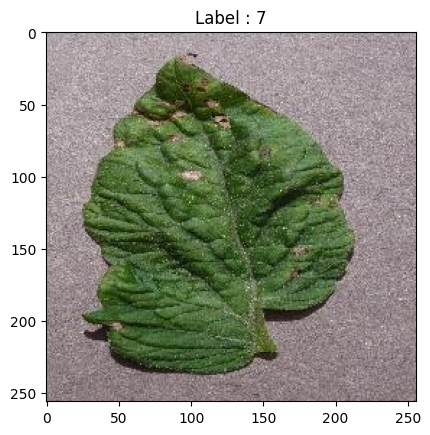

In [21]:
from matplotlib import pyplot as plt
image,label= test_dataset[24]
plt.title(f'Label : {label}')
plt.imshow(image)


In [22]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)
image.shape


ValueError: too many values to unpack (expected 2)